In [1]:
%matplotlib inline
import psycopg2
import datetime
import pytz
import numpy as np
POSTGIS = psycopg2.connect(database='postgis', host='iemdb', user='nobody')
cursor = POSTGIS.cursor()

BASE = datetime.datetime(2013,11,17,0,0)
BASE = BASE.replace(tzinfo=pytz.timezone("America/Chicago"))

counts = np.zeros( (2880,), 'f')
torcounts = np.zeros( (2880,), 'f')

cursor.execute("""
  SELECT issue, expire, phenomena from warnings_2013 where issue > '2013-11-17' and
  phenomena in ('SV','TO') and significance = 'W' and gtype = 'P'
""")
svr = 0
tor = 0
for row in cursor:
    offset1 = ((row[0] - BASE).days * 86400 + (row[0] - BASE).seconds) / 60.0
    offset2 = ((row[1] - BASE).days * 86400 + (row[1] - BASE).seconds) / 60.0
    counts[offset1:offset2] += 1
    if row[2] == 'TO':
        torcounts[offset1:offset2] += 1
        tor += 1
    else:
        svr += 1
print tor
print svr
    
POSTGIS.close()


125
220


In [28]:
xticks = []
xticklabels = []
for i in range(0,2880,120):
    ts = BASE + datetime.timedelta(minutes=i)
    xticks.append(i)
    xticklabels.append( ts.strftime("%-I\n%p") )

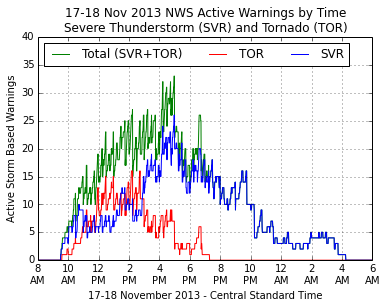

In [30]:
import matplotlib.pyplot as plt

(fig, ax) = plt.subplots(1,1)
ax.plot( np.arange(2880), counts, color='g', label='Total (SVR+TOR)')
ax.plot( np.arange(2880), torcounts, color='r', label='TOR')
ax.plot( np.arange(2880), counts - torcounts, color='b', label='SVR')
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
ax.set_xlim(60*8,1440+60*6)
ax.grid(True)
ax.set_ylabel("Active Storm Based Warnings")
ax.legend(loc=2, ncol=3)
ax.set_ylim(top=40)
ax.set_xlabel("17-18 November 2013 - Central Standard Time")
ax.set_title("17-18 Nov 2013 NWS Active Warnings by Time\nSevere Thunderstorm (SVR) and Tornado (TOR)")

fig.savefig('test.ps')